<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/cnn-mnist-digits/blob/master/CNN_MNIST_Functional_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
dataset=pd.read_csv('sample_data/mnist_train_small.csv',header=None)
dataset_test=pd.read_csv('sample_data/mnist_test.csv',header=None)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train=dataset.iloc[:,1:].values.reshape(dataset.iloc[:,1:].shape[0],28,28,1)
Y_train=dataset.iloc[:,0].values

In [0]:
X_test=dataset_test.iloc[:,1:].values.reshape(dataset_test.iloc[:,1:].shape[0],28,28,1)
Y_test=dataset_test.iloc[:,0].values

In [0]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [10]:
X_train.shape

(20000, 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

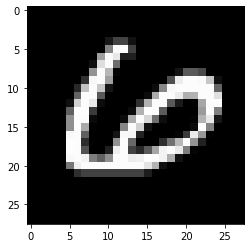

In [12]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

In [0]:
img=np.array(X_train[0].reshape(28,28))

##CNN

In [0]:
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [0]:
inp = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(inp)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
dense = Dense(128, activation='relu')(flat)
out = Dense(10, activation='softmax')(dense)

In [10]:
model = Model(inputs=inp, outputs=out)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 16)          8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896 

In [0]:
model = load_model('CNN-MNIST-functional.h5')

In [10]:
history=model.fit(X_train, Y_train, batch_size=25, epochs=50, validation_split=0.2,verbose=1)

Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 6s 369us/sample - loss: 0.7492 - accuracy: 0.8512 - val_loss: 0.3200 - val_accuracy: 0.9085
Epoch 2/50
16000/16000 [==============================] - 4s 247us/sample - loss: 0.1761 - accuracy: 0.9506 - val_loss: 0.1597 - val_accuracy: 0.9555
Epoch 3/50
16000/16000 [==============================] - 4s 246us/sample - loss: 0.1059 - accuracy: 0.9691 - val_loss: 0.1407 - val_accuracy: 0.9622
Epoch 4/50
16000/16000 [==============================] - 4s 245us/sample - loss: 0.0925 - accuracy: 0.9722 - val_loss: 0.1288 - val_accuracy: 0.9657
Epoch 5/50
16000/16000 [==============================] - 4s 248us/sample - loss: 0.0726 - accuracy: 0.9771 - val_loss: 0.1562 - val_accuracy: 0.9575
Epoch 6/50
16000/16000 [==============================] - 4s 245us/sample - loss: 0.0561 - accuracy: 0.9824 - val_loss: 0.1398 - val_accuracy: 0.9707
Epoch 7/50
16000/16000 [===========================

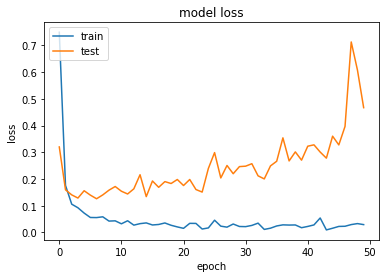

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save("CNN-MNIST-functional.h5")

##TESTING##

In [0]:
image = X_train[0].astype(np.float32)

In [15]:
image.reshape(1,28,28,1).shape

(1, 28, 28, 1)

In [0]:
pred=model.predict(image.reshape(1,28,28,1))

In [19]:
np.argmax(pred)

6

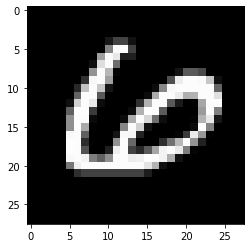

In [20]:
plt.gray()
plt.imshow(X_train[0].reshape(28,28))

In [26]:
model = Model(inputs=inp, outputs=conv1)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 25, 25, 32)        544       
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [0]:
pred=model.predict(image.reshape(1,28,28,1))

In [28]:
pred.shape

(1, 25, 25, 32)

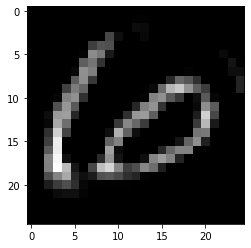

In [32]:
plt.imshow(pred.reshape(25,25,32)[:,:,4])

In [0]:
fig, ax = plt.subplots(nrows=8, ncols=7)#, figsize=(20, 10)
i,j=0,0
for ii in range(32):
    ax[0].plot(2)#.imshow(pred.reshape(25,25,32)[:,:,ii])
    # j=j+1
    # if(ii%3==0):
    #     i=i+1
    #     j=0